## Miniproject 2: MovieLens Visualization



### Download data

In [88]:
import requests
import numpy as np

url_dict = {
     'data.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/data.csv',
     'movies.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/movies.csv',
     'train.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/train.csv',
     'test.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/test.csv'
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

download_file('data.csv')
download_file('movies.csv')
download_file('train.csv')
download_file('test.csv')

Start downloading...


Complete
Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete


In [89]:
import pandas as pd

data = pd.read_csv('data.csv')
movies = pd.read_csv('movies.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [90]:
# Look at the first few rows of the data
print(data.head())

   User ID  Movie ID  Rating
0      196       242       3
1      186       302       3
2       22       377       1
3      244        51       2
4      166       346       1


In [91]:
# Look at the first few rows of the movies
print(movies.head())

   Movie ID        Movie Title  Unknown  Action  Adventure  Animation  \
0         1   Toy Story (1995)        0       0          0          1   
1         2   GoldenEye (1995)        0       1          1          0   
2         3  Four Rooms (1995)        0       0          0          0   
3         4  Get Shorty (1995)        0       1          0          0   
4         5     Copycat (1995)        0       0          0          0   

   Childrens  Comedy  Crime  Documentary  ...  Fantasy  Film-Noir  Horror  \
0          1       1      0            0  ...        0          0       0   
1          0       0      0            0  ...        0          0       0   
2          0       0      0            0  ...        0          0       0   
3          0       1      0            0  ...        0          0       0   
4          0       0      1            0  ...        0          0       0   

   Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0        0       

In [92]:
# Look at the first few rows of the train and test data
print(train.head())
print(test.head())

   User ID  Movie ID  Rating
0      196       242       3
1      186       302       3
2       22       377       1
3      166       346       1
4      298       474       4
   User ID  Movie ID  Rating
0      707       766       3
1      943       188       4
2      772       313       5
3      828        26       3
4      854       514       4


# Basic Visualizations

## 1. Visualize the distribution of the ratings

/home/ethan-e/Programs/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


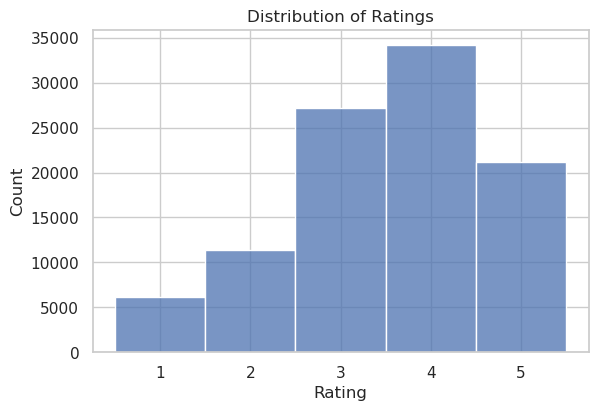

In [93]:

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(style="whitegrid")
ax = sns.histplot(x=data['Rating'],discrete=bool)
ax.set_box_aspect(0.65)
plt.title('Distribution of Ratings')
plt.show()

## 2. Ten most popular movies

In [94]:
# Find ten most popular movies
movie_ratings = data.groupby('Movie ID').size()
movie_ratings = movie_ratings.sort_values(ascending=False)
movie_ratings_top10_names = movie_ratings.head(10)
movie_ratings_top10 = data[data['Movie ID'].isin(movie_ratings_top10_names.index)]
print(movie_ratings_top10)
print(movie_ratings_top10_names)

       User ID  Movie ID  Rating
24         308         1       4
50         251       100       4
53          25       181       5
61          20       288       1
100         32       294       3
...        ...       ...     ...
99930      895       100       4
99941      593         1       3
99942      363       181       5
99948      780        50       5
99951      130       121       5

[4863 rows x 3 columns]
Movie ID
50     583
258    509
100    508
181    507
294    485
286    481
288    478
1      452
300    431
121    429
dtype: int64


3.772979642196175
4863


/home/ethan-e/Programs/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Ratings for the Ten Most Popular Movies')

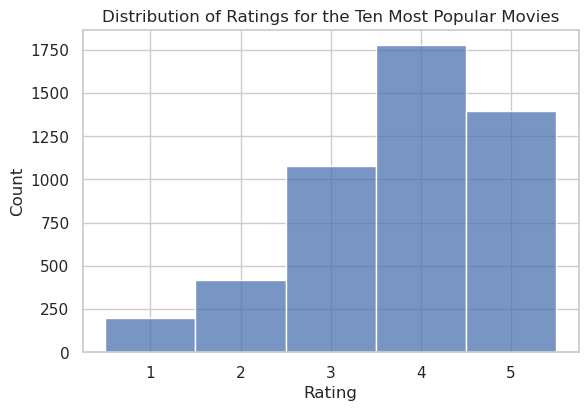

In [95]:
#plot the distribution of ratings for the ten most popular movies
rateAvg = np.mean(movie_ratings_top10['Rating'])
print(rateAvg)
print(len(movie_ratings_top10['Rating']))
ax = sns.histplot(x=movie_ratings_top10['Rating'],discrete=bool)
ax.set_box_aspect(0.65)
plt.title('Distribution of Ratings for the Ten Most Popular Movies')

## 3. Ratings of ten best movies

In [96]:
# Find the ten best movies
movie_ratings = data.groupby('Movie ID').mean()
movie_ratings = movie_ratings.sort_values(by='Rating', ascending=False)
movie_ratings_best10_names = movie_ratings.head(10)
movie_ratings_best10 = data[data['Movie ID'].isin(movie_ratings_best10_names.index)]
print(movie_ratings_best10)
print(movie_ratings_best10_names)

       User ID  Movie ID  Rating
4545        87      1189       5
6126       279      1500       5
6519        13       814       5
12314      385      1536       5
23044      489      1293       5
43688      437      1599       5
45350      519      1293       5
47866      675      1653       5
49046      146      1293       5
62150      416      1189       5
62282      244      1467       5
65288      532      1189       5
77635       60      1122       5
78008       90      1201       5
95364      781      1500       5
97057      886      1467       5
             User ID  Rating
Movie ID                    
814        13.000000     5.0
1599      437.000000     5.0
1201       90.000000     5.0
1122       60.000000     5.0
1653      675.000000     5.0
1293      384.666667     5.0
1500      530.000000     5.0
1189      345.000000     5.0
1536      385.000000     5.0
1467      565.000000     5.0


/home/ethan-e/Programs/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Ratings for the Ten Best Movies')

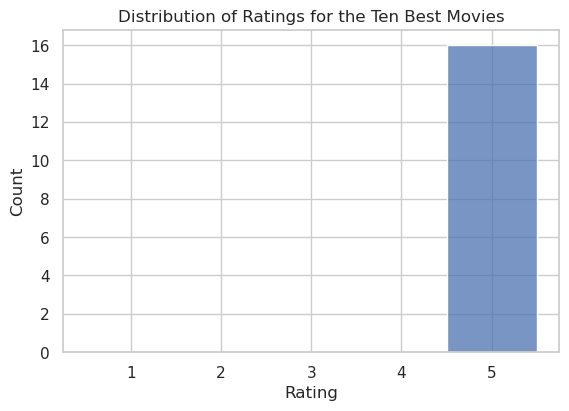

In [97]:
#plot the distribution of ratings for the ten best movies
ax = sns.histplot(x=movie_ratings_best10['Rating'],discrete=bool)
ax.set(xlim=(0.25, 5.75))
ax.set_box_aspect(0.65)
plt.title('Distribution of Ratings for the Ten Best Movies')

## 4. All ratings of movies from three genres

In [98]:
# List all the genres
genres = movies.columns[2:]
genres = genres.drop_duplicates()
print(genres)

Index(['Unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [99]:
# Choose the genres Sci-Fi, Comedy, and Adventure, and find the corresponding movies
genres = ['Sci-Fi', 'Comedy', 'Adventure']
movies_genres = movies[movies[genres].sum(axis=1) > 0]
print(movies_genres[['Movie ID', 'Movie Title', 'Sci-Fi', 'Comedy', 'Adventure']])

      Movie ID                      Movie Title  Sci-Fi  Comedy  Adventure
0            1                 Toy Story (1995)       0       1          0
1            2                 GoldenEye (1995)       0       0          1
3            4                Get Shorty (1995)       0       1          0
6            7            Twelve Monkeys (1995)       1       0          0
7            8                      Babe (1995)       0       1          0
...        ...                              ...     ...     ...        ...
1658      1659  Getting Away With Murder (1996)       0       1          0
1663      1664   8 Heads in a Duffel Bag (1997)       0       1          0
1667      1668        Wedding Bell Blues (1996)       0       1          0
1669      1670                   Tainted (1998)       0       1          0
1680      1681              You So Crazy (1994)       0       1          0

[679 rows x 5 columns]


In [100]:
# Separate the rating for the three genres
sci_fi = data[data['Movie ID'].isin(movies_genres[movies_genres['Sci-Fi'] == 1]['Movie ID'])]
comedy = data[data['Movie ID'].isin(movies_genres[movies_genres['Comedy'] == 1]['Movie ID'])]
adventure = data[data['Movie ID'].isin(movies_genres[movies_genres['Adventure'] == 1]['Movie ID'])]

### Sci-Fi

3.5607227022780834


/home/ethan-e/Programs/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Ratings for the Sci-Fi Movies')

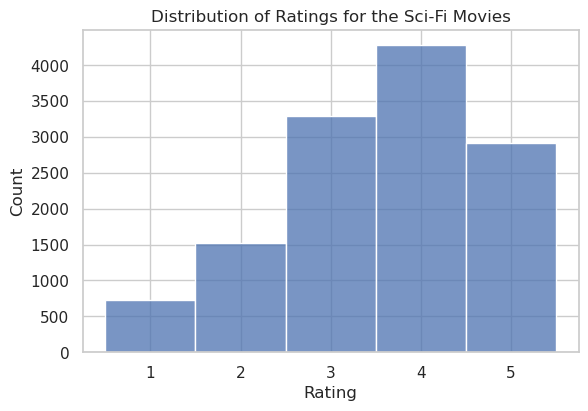

In [101]:
ax = sns.histplot(x=sci_fi['Rating'],discrete=bool)
ax.set_box_aspect(0.65)
print(np.mean(sci_fi['Rating']))
plt.title('Distribution of Ratings for the Sci-Fi Movies')

### Comedy

3.3940734781442745


/home/ethan-e/Programs/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Ratings for the Comedy Movies')

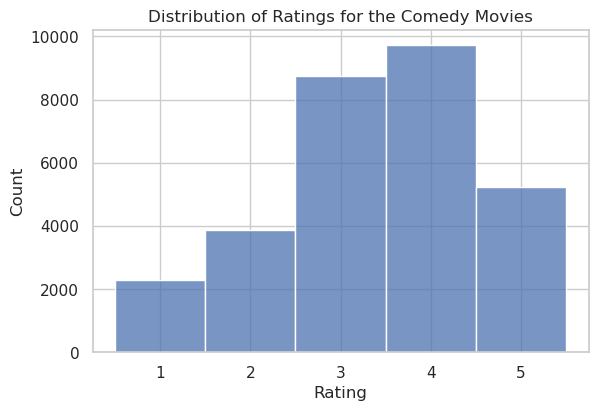

In [102]:
print(np.mean(comedy['Rating']))
ax = sns.histplot(x=comedy['Rating'],discrete=bool)
ax.set_box_aspect(0.65)
plt.title('Distribution of Ratings for the Comedy Movies')

### Advanture Movies

3.503526503308369


/home/ethan-e/Programs/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Ratings for the Adventure Movies')

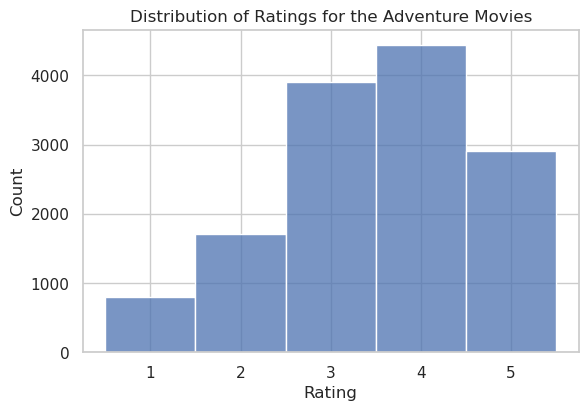

In [103]:
ax = sns.histplot(x=adventure['Rating'],discrete=bool)
ax.set_box_aspect(0.65)
print(np.mean(adventure['Rating']))
plt.title('Distribution of Ratings for the Adventure Movies')